<a href="https://colab.research.google.com/github/hassanjavaid07/CS500-Generative-AI-and-LLM/blob/main/Assignment01/assignment01_MSCS23001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
###<u> **GENERATIVE AI & LLM ASSIGNMENT # 1** </u>
* **NAME = HASSAN JAVAID**
* **ROLL NO. = MSCS23001**
* **TITLE = RANDOM NUMBER GENERATORS**
* **TASKS = Implementation of Uniform, Gaussian and Multi-variate Gaussian
* **        generators and sampling thru them**
* **ALGORITHM used: Uniform, Gaussian, MV Gaussian Distributions **
"""

##  **GENERATIVE AI & LLM ASSIGNMENT # 1**
#### **NAME = HASSAN JAVAID**
#### **ROLL_NO = MSCS23001**
#### **TITLE = RANDOM NUMBER GENERATORS**
#### **TASKS = Implementation of Uniform, Gaussian and Multi-variate Gaussian**
#### **generators and sampling thru them**
#### **Algorithms used: Uniform, Gaussian, MV Gaussian Distributions**

In [1]:
from urllib.request import url2pathname
import numpy as np
from matplotlib import pyplot as plt
from typing import List, Optional
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd

COUNT=1000000

class RNG:

    @staticmethod
    def uniform(count: int) -> np.ndarray:
        return np.random.uniform(size=count)

    @staticmethod
    def gaussian(count: int,
                 mean: float = 0,
                 std_dev: float = 1) -> np.ndarray:
        ctr = count//2
        u1 = np.random.uniform(size=ctr)
        u2 = np.random.uniform(size=ctr)
        z0 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
        z1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)
        samples = np.concatenate((z0, z1))
        return mean + std_dev * samples


    @staticmethod
    def mv_gaussian(mean_vec: List[float], cov_matrix: List[List[float]], count: int=5000) -> np.ndarray:
        mean_vec = np.array(mean_vec)
        cov_matrix = np.array(cov_matrix)

        eig_v, eig_vectors = np.linalg.eigh(cov_matrix)
        svd_matrix = eig_vectors @ np.diag(np.sqrt(eig_v))
        z_pts = np.random.normal(size=(count, len(mean_vec)))
        mv_pts = mean_vec + z_pts @ svd_matrix.T

        return mv_pts

In [2]:
RNG.uniform(20)

array([0.10983686, 0.81623633, 0.37234468, 0.03371712, 0.78625269,
       0.15711727, 0.33404692, 0.60914711, 0.5947126 , 0.24240087,
       0.35119008, 0.21591375, 0.53053002, 0.77369241, 0.6716523 ,
       0.46384089, 0.55139233, 0.9885784 , 0.43913873, 0.19174375])

In [3]:
RNG.gaussian(20, 0.5, 0.5)

array([ 0.76921572,  0.16034713,  0.20498468,  0.54411758,  0.99677277,
       -0.397932  ,  0.7577609 , -0.18734133,  0.50501966,  0.30627701,
        0.43899864,  0.55471804,  0.26929522, -0.03286609,  0.59754815,
        0.76979428,  1.53489409, -0.34422045,  0.90107337,  0.25811726])

In [4]:
RNG.mv_gaussian([0, 0], [[1, 0], [0, 1]], 20)

array([[ 0.85453501,  0.75827357],
       [ 0.11079041,  0.99594629],
       [ 0.47881073,  0.46794684],
       [-0.51986939,  0.09711172],
       [ 0.40351189, -0.17476419],
       [ 0.89682022,  1.51080854],
       [ 0.80656479,  1.94918227],
       [-0.04000166, -0.50279289],
       [-0.28747227,  0.33032101],
       [ 0.17774635,  1.65440933],
       [ 0.08906481,  0.12254551],
       [ 2.34010288, -1.37292367],
       [-1.55368202,  1.81149675],
       [ 0.16473161, -0.23271211],
       [ 0.32319687, -0.17838243],
       [-1.53682512, -0.73326504],
       [-1.48730681, -0.53356652],
       [-0.36236905,  1.02000946],
       [ 0.6032627 ,  0.28134438],
       [-0.65206922, -0.13663294]])

##Plotting Functions

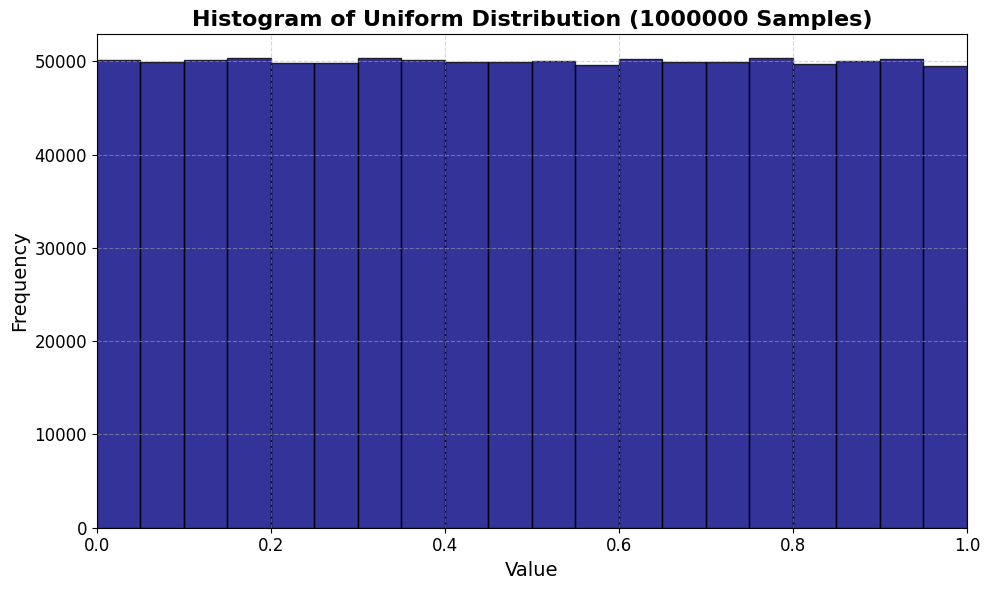

In [5]:
# Implements the histogram plot for Gaussian
def genUniformPlot(count:int=5000):
    samples = RNG.uniform(count)
    plt.figure(figsize=(10, 6))
    plt.hist(samples, bins=20, color='navy', edgecolor='black', alpha=0.8)
    plt.title(f'Histogram of Uniform Distribution ({count} Samples)', fontsize=16, weight='bold')
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlim(0, 1)
    plt.tight_layout()
    plt.show()

genUniformPlot(COUNT)

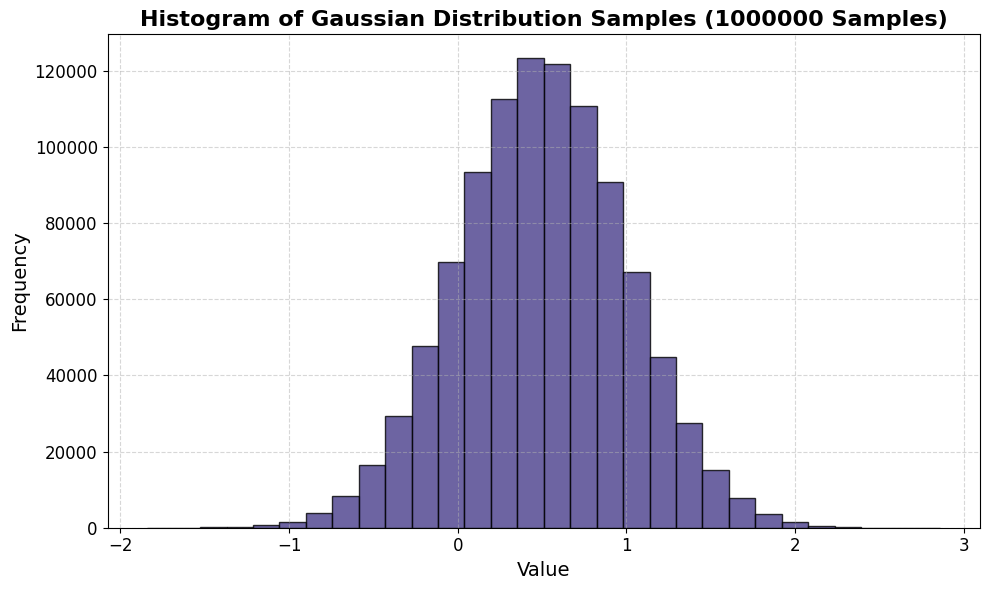

In [6]:
# Implements the histogram plot for Gaussian
def genGaussianPlot(count=5000, mean=0, std_dev=1):
    samples = RNG.gaussian(count, 0.5, 0.5)
    plt.figure(figsize=(10, 6))
    plt.hist(samples, bins=30, color='darkslateblue', edgecolor='black', alpha=0.8)
    plt.title(f'Histogram of Gaussian Distribution Samples ({count} Samples)', fontsize=16, weight='bold')
    plt.xlabel('Value', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

genGaussianPlot(COUNT)

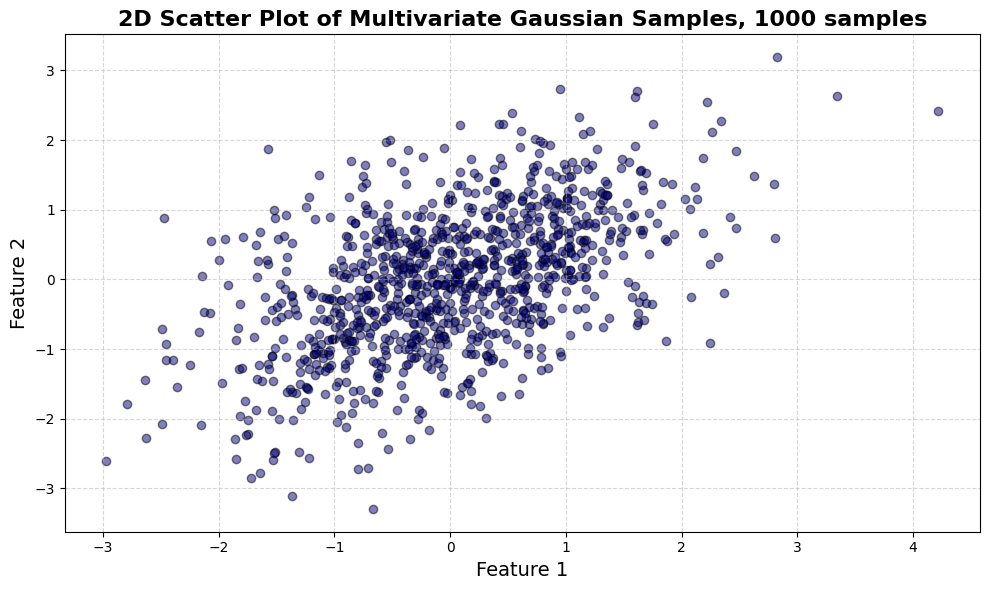

In [7]:
# Implements the 2D scatter plot for MV Gaussian
def genMVGaussianPlot_2d(samples: np.ndarray, count: int=1000):
    plt.figure(figsize=(10, 6))
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, color='navy', edgecolor='black')
    plt.title(f'2D Scatter Plot of Multivariate Gaussian Samples, {count} samples', fontsize=16, weight='bold')
    plt.xlabel('Feature 1', fontsize=14)
    plt.ylabel('Feature 2', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Generate 2D samples pts
mean_vector_2d = [0, 0]
cov_matrix_2d = [[1, 0.5], [0.5, 1]]
samples_2d = RNG.mv_gaussian(mean_vector_2d, cov_matrix_2d, count=1000)
genMVGaussianPlot_2d(samples_2d)

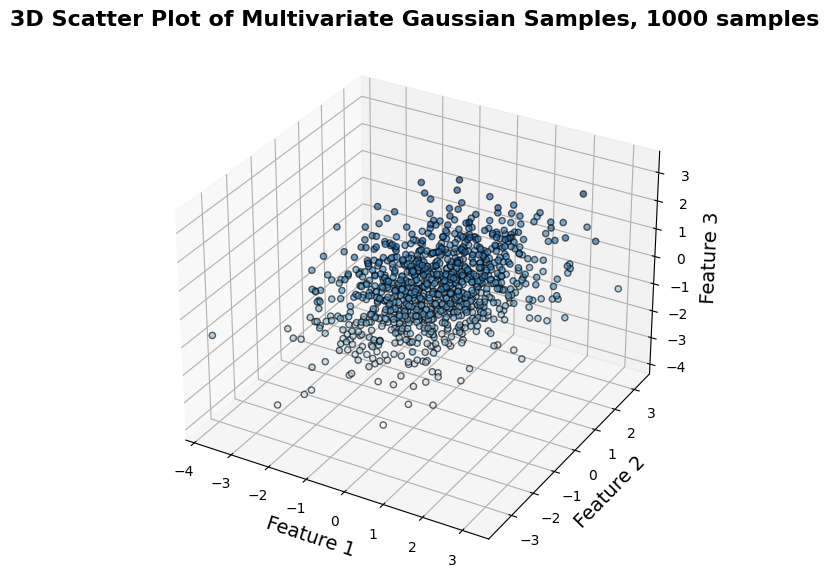

In [8]:
# Implements the 3D scatter plot for MV Gaussian
def genMVGaussianPlot_3d(samples: np.ndarray, count:int=1000):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Using a colormap for varying colors in blue shades
    scatter = ax.scatter(samples[:, 0], samples[:, 1], samples[:, 2],
                         c=samples[:, 2], cmap='Blues', alpha=0.6, edgecolor='k')

    ax.set_title(f'3D Scatter Plot of Multivariate Gaussian Samples, {count} samples', fontsize=16, weight='bold')
    ax.set_xlabel('Feature 1', fontsize=14)
    ax.set_ylabel('Feature 2', fontsize=14)
    ax.set_zlabel('Feature 3', fontsize=14)
    plt.show()

# Generate 3D samples pts
mean_vector_3d = [0, 0, 0]
cov_matrix_3d = [[1, 0.5, 0.2], [0.5, 1, 0.3], [0.2, 0.3, 1]]
samples_3d = RNG.mv_gaussian(mean_vector_3d, cov_matrix_3d, count=1000)
genMVGaussianPlot_3d(samples_3d)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been as

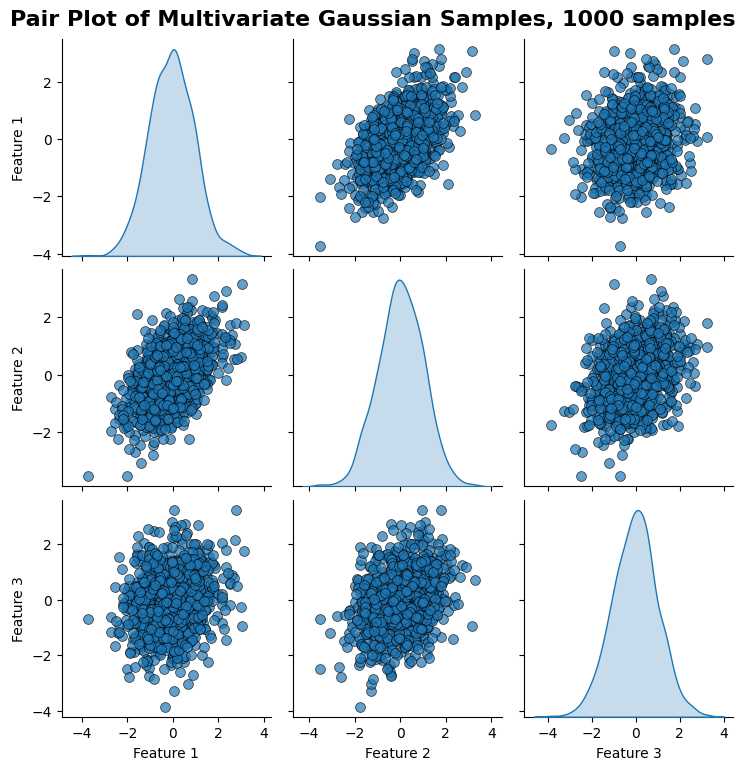

In [9]:
def genPairPlot(samples: np.ndarray, count:int=1000):
    df = pd.DataFrame(samples, columns=['Feature 1', 'Feature 2', 'Feature 3'])
    sns.pairplot(df, diag_kind='kde', palette='Blues', plot_kws={'alpha': 0.7, 's': 50, 'edgecolor': 'k'})
    plt.suptitle(f'Pair Plot of Multivariate Gaussian Samples, {count} samples', fontsize=16, weight='bold', y=1.02)
    plt.show()

genPairPlot(samples_3d)

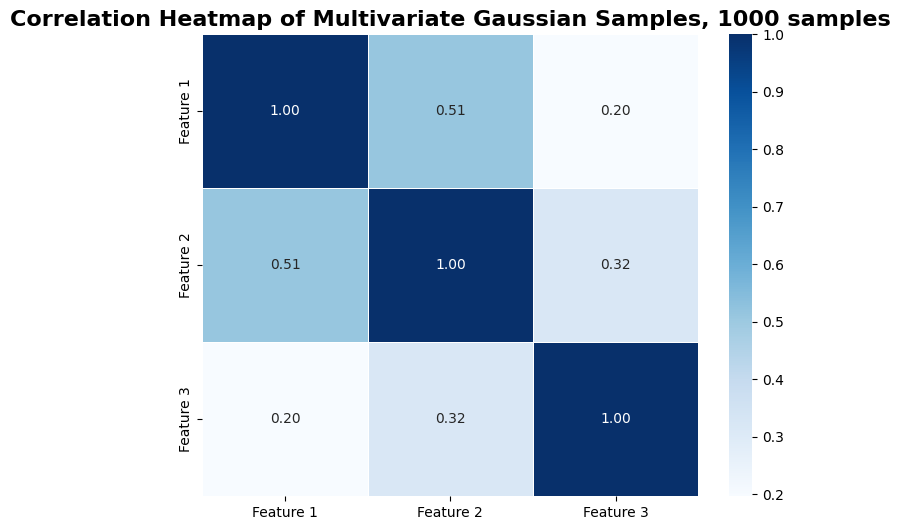

In [10]:
# Implements the plotting of heatmap for correlation of different features
def genHeatmap_MV(samples: np.ndarray, count:int=1500):
    df = pd.DataFrame(samples, columns=['Feature 1', 'Feature 2', 'Feature 3'])
    corr_matrix = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=.5)
    plt.title(f'Correlation Heatmap of Multivariate Gaussian Samples, {count} samples', fontsize=16, weight='bold')
    plt.show()

genHeatmap_MV(samples_3d, 1000)

In [ ]:
# End of Assignment